In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

### 2.3.1 예제에 사용할 데이터셋

여러 알고리즘을 설명하기 위해 데이터셋도 여러 개 사용하겠습니다.</br>
어떤 데이터셋은 작고 인위적으로 만든 것이며, 알고리즘의 특징을 부각하기 위해 만든 것도 있습니다. 실제 샘플로 만든 큰 데이터셋도 있습니다. </br>
</br>
두 개의 특성을 가진 forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋입니다.</br>
다음 코드는 이 데이터셋의 모든 데이터 포인트를 산점도로 그립니다. </br>
x축은 첫 번째 특성이고 y축은 두 번째 특성입니다. 

X.shape: (26, 2)


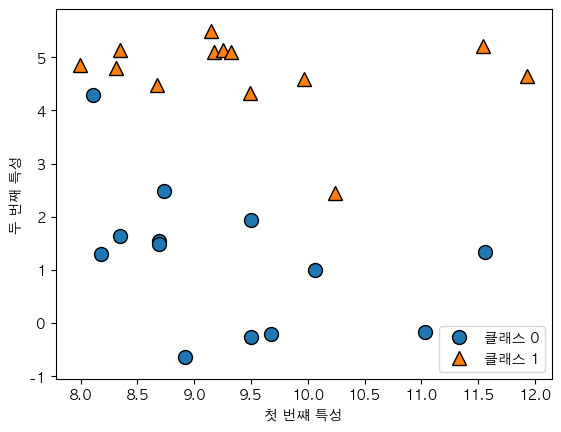

In [6]:
# 데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
from matplotlib import rc
rc('font', family='AppleGothic') 			## 애플 폰트 추가로
plt.rcParams['axes.unicode_minus'] = False  ## 한글 깨짐 방지


mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번쨰 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

X.shape 값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가집니다.</br>
회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용하겠습니다. </br>
wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)를 가집니다. 

Text(0, 0.5, '타깃')

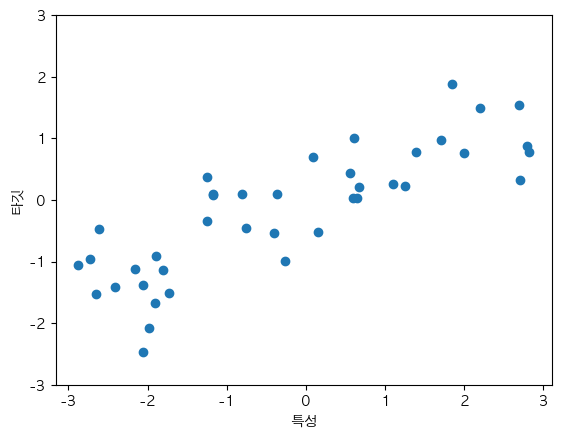

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

x축을 특성, y축을 타깃으로 한 wave 데이터셋의 그래프

종이는 2차우너이라 둘이 넘는 특성은 표현하기 어려우니 손쉽게 시각화하기 위해서 간단한 저차원 데이터셋을 사용하였습니다. 특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관이 특성이 많은 데이터셋(고차원 데이터셋)에서 그대로 유지되지 않을 수 있습니다. 하지만 이런 사실을 유념해둔다면 알고리즘을 배울 떄 저차원 데이터셋을 사용하는 것이 매우 좋습니다.


인위적인 소규모 데이터셋 외에 scikit-learn에 들어 있는 실제 데이터셋도 두 개를 사용하겠습니다. 하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 데이터셋입니다(줄여서 cancer라고 하겠습니다). 각 종양는 양성(해롭지 않은 종양)과 악성(암 종양)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측할 수 있도록 학습하는 것이 과제입니다.


이 데이터는 scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있습니다.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [11]:
print("클래스 별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스 별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [13]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


또 회귀 분석용 실제 데이터셋으로는 보스턴 주택가격 데이터셋을 사용하겠습니다.
이 데이터셋으로 할 작업은 법죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주책 평균 가격을 예측하는 것입니다. 

이 데이터셋에는 데이터포인드 506개와 특성 13개가 있습니다.

In [14]:
# 보스턴 추택 데이터셋이 1.2버전에서 삭제되므로 다음과 같이 코드를 수정합니다
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [15]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## 2.3.2 k-최근접 이웃

k-NN 알고리즘은 가장 간단한 머신러닝 알고리즘입니다. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부입니다. 새로운 데이터 포인트에 대해 예측할 땐

알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트. 즉 '최근접 이웃'을 찾습니다.

### k-최근접 이웃 분류

가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용합니다.

단순히 이 훈련 데이터 포인트의 출력이 예측됩니다.

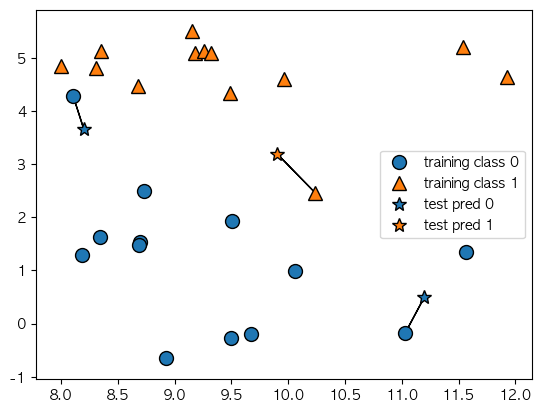

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

해당 그림에는 데이터 포인트를 3개를 추가했습니다. (별 모양 표시)

그리고 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결했습니다. 1-최근접 이웃 알고리즘의 예측은 
이 데이터 포인트의 레이블이 됩니다.

가장 가까운 이웃 하나가 아니라 임의의 k개를 선택할 수도 있습니다. 그래서 k-최근접 이웃 알고리즘이라 부릅니다. 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 합니다. 즉 테스트 포인트 하나에 클래스 0에 속한 이웃이 몇 개인지, 그리고 클래스 1에 속한 이웃이 몇 개인지를 셉니다.

그리고 이웃이 더 많은 클래스를 레이블로 지정합니다. 다시 말해 k-최근접 이웃 중 다수의 클래스가 레이블이 됩니다.

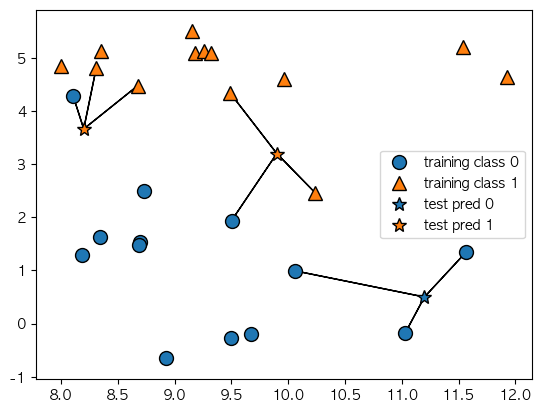

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

3개의 데이터 포인터 중 가장 왼쪽의 것은 이웃을 1개만 사용했을 떄와 예측이 달라진 것을 알 수 있습니다.

이 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에서도 같으 방법을 적용할 수 있습니다. 클래스가 여러 개일 떄도 각 클래스에 속한 이웃이 몇 개인지를 헤아려 가장 많은 클래스를 예측값으로 사용합니다.

#### 이제 scikit-learn을 사용하여 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살펴보겠습니다.

In [18]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [20]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [24]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


이 모델의 정확도는 86%로 나왔습니다. 즉 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였습니다.

#### KNeighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있습니다.

그리고 각 데이터 보인트가 속한 클래스에 따라 평면에 색을 칠합니다. 이렇게 하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는

결정 경계(decision boundary)를 볼 수 있습니다. 다음 코드는 이웃이 하나, 셋 아홉 개일 떄의 결정 경계를 보여줍니다.

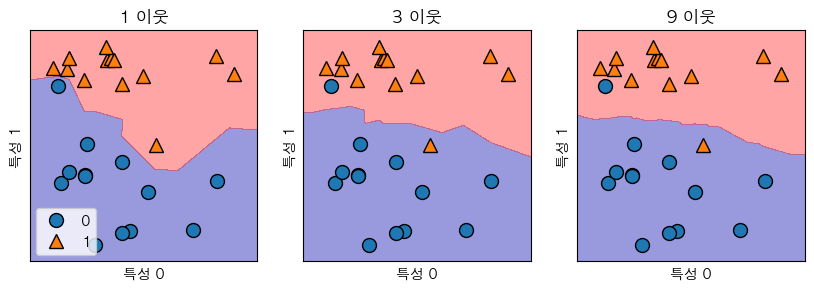

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다.
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

1개의 이웃을 선택 했을 때의 결정 경계가 훈련 데이터에 가깝게 따라가는것을 볼 수 있습니다.

이웃의 수를 늘릴수록 결정 경계는 더 부드러워집니다. 부드러운 경계는 더 단순한 모델을 의미합니다. 다시 말해 이웃을 적게 사요하면 모델의 복잡도가 높아지고, 많이 사요하면 복잡도는 낮아집니다.

훈련 데이터 젠체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트트 포인트에 대한 예측은 모두 같은 값이 됩니다. 

앞서 이야기한 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴보겠습니다. 이를 위해 실제 데이터인 유방암 데이터셋을 사용하겠습니다. 먼저 훈련 세트와 테스트 세트로 나눕니다. 그런 다음 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능을 평가합니다.

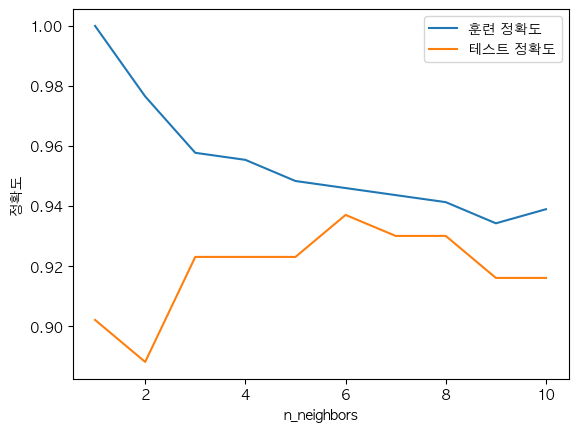

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

최근접 이웃의 수가 1개일 때는 훈련 데이터에 대한 예측이 완벽합니다.

하지만 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듭니다. 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮습니다. 이는 1-최근접 이웃 모델을 너무 복잡하게 만든다는 것을 설명해줍니다.

반대로 이웃을 10개 사용했을 때는 모델이 너무 단순에서 정확도가 더 나빠집니다. 가장 좋을 때는 중간 정도인 6개를 사용한 경우입니다.

#### k-최근접 이웃 회귀

k-최근접 이웃 알고리즘은 회귀 분석에도 쓰입니다. 이번에는 wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용해보겠습니다. x축에 3개의 테스트 데이터를 흐린 별 보양으로 표시했습니다.

최근접 이웃을 1개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃 값입니다. 이 예측은 친한 별 모양으로 표시했습니다.

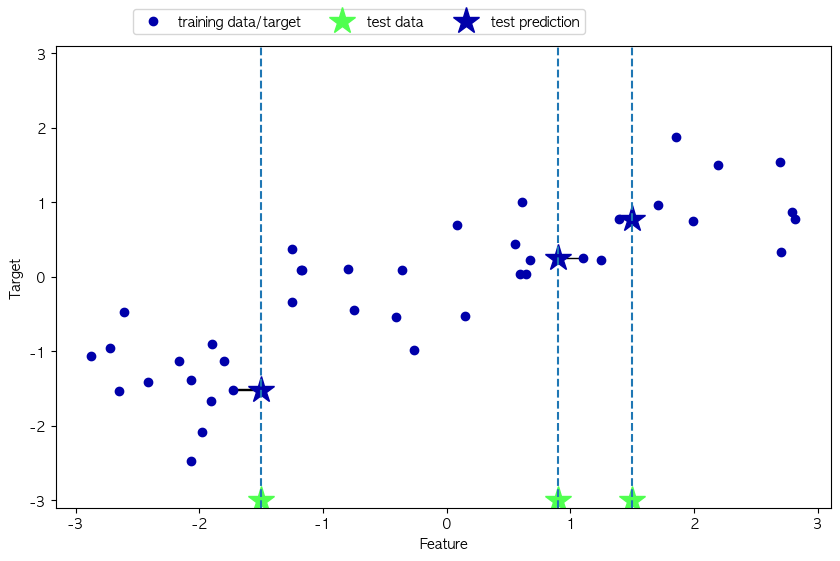

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

여기서도 이웃을 둘 이상 사용하여 회귀 분석을 할 수 있습니다.

여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측이 됩니다.

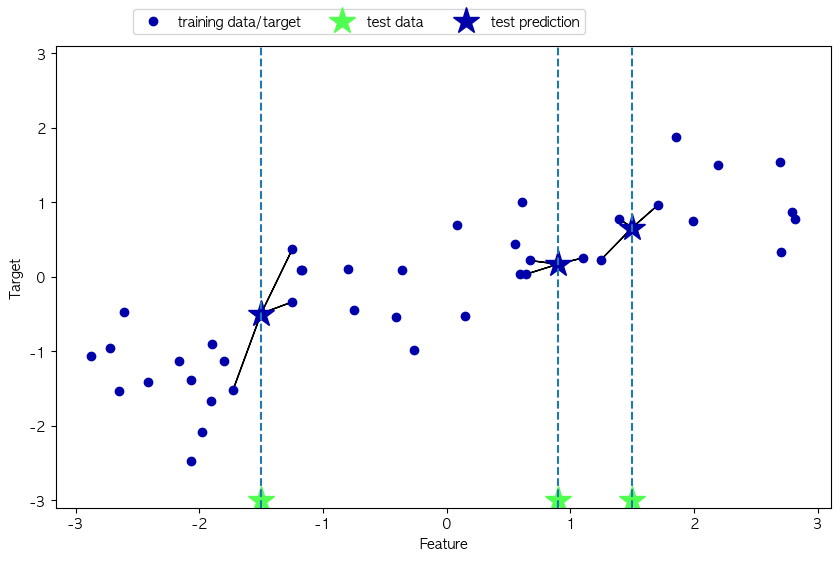

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

scikit-learn에서도 회귀를 위한 k-최근접 이웃 알고리즘이 구현되어 있습니다.

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


여기에서도 score 메서드로 모델을 평가할 수 있습니다.

이 메서드는 회귀일 땐 R^2 값을 반환합니다. 결정 계수라고 하는 R^2 값은 회귀 모델에서 예측의 정확도를 측정한 것으로 보통 0과 1 사이의 값이 됩니다.

1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우입니다.

In [32]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


점수는 0.83으로 모델이 비교적 잘 들어맞은 것 같습니다.

#### KNeighborsRegressor 분석

이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있습니다.

이를 위해 x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듭니다.

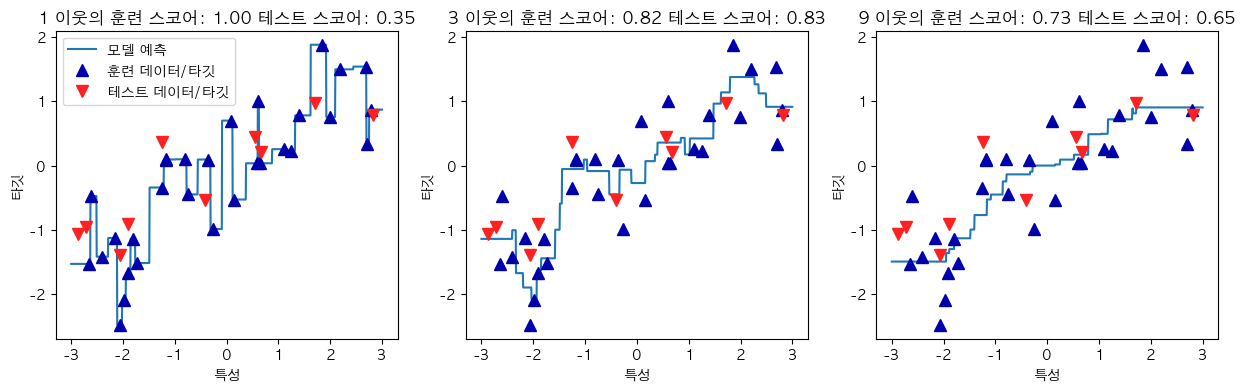

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")

그림에서 볼 수 있듯이 이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포이트를 모두 지나갑니다. 

이는 매우 불안정한 예측을 만들어냅니다. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게 됩니다.

### 장단점과 매개변수

일반적으로 KNeighbors 분류기에 가장 중요한 매개변수는 두 개 입니다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수입니다. </br>
</br>
</br>
실제로 이웃의 수는 3개나 5개 정도로 적을 떄 잘 작동하지만, 이 매개변수는 잘 조정해야 합니다. 거리를 재는 방법은 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용합니다.</br>
</br>
k-NN의 장점은 이해하기 쉬운 모델이고 많이 조정하지 않아도 자주 좋은 성능을 발휘한다는 점입니다.</br>
보통 최근접 이웃 모델은 매우 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 클 경우) 예측이 느려집니다.
k-NN 알고리즘을 사용할 땐 데이터를 전처리하는 과정이 중요합니다.</br> 
그리고 (수백 개 이상의) 많은 특성 feature를 가진 데이터셋에서는 잘 동작하지 않으며, 
특성 값 대부분이 0인 (즉 희소한) 데이터셋과는 특히 잘 작동하지 않습니다.

k-최근접 이웃 알고리즘이 이해하긴 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부적해 현업에서는 잘 쓰지 않습니다. 

이런 단점이 없는 알고리즘이 다음에 설명할 선형 모델입니다.